In [2]:
import numpy as np
import pandas as pd

C:\Users\USER\AppData\Local\Temp\ipykernel_23188\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_excel("coffeeOrdersData.xlsx",sheet_name='orders')

In [4]:
df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales,Coffee Type Name,Roast Type Name,Loyalty Card
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,United States,Rob,M,1.0,9.950,9.9500,Robusta,Medium,Yes
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,United States,Exc,M,0.5,8.250,4.1250,Excelsa,Medium,Yes
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,United States,Ara,L,1.0,12.950,12.9500,Arabica,Light,Yes
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,Ireland,Exc,M,1.0,13.750,13.7500,Excelsa,Medium,No
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,Ireland,Rob,L,2.5,27.485,68.7125,Robusta,Light,No


In [5]:
df_array = np.array(df)
df_1D = np.array(df.iloc[0])
df_2D = np.array(df.iloc[0:3])
df_3D = np.array(df.iloc[0:3,4])

In [6]:
df1 = pd.DataFrame([df.iloc[0].values], range(1,5) , columns=df.columns)
df1

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales,Coffee Type Name,Roast Type Name,Loyalty Card
1,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,United States,Rob,M,1.0,9.95,9.95,Robusta,Medium,Yes
2,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,United States,Rob,M,1.0,9.95,9.95,Robusta,Medium,Yes
3,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,United States,Rob,M,1.0,9.95,9.95,Robusta,Medium,Yes
4,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,United States,Rob,M,1.0,9.95,9.95,Robusta,Medium,Yes


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month']=df['Order Date'].dt.month

df_agg = df.groupby(['Month','Roast Type'])[['Sales']].sum()
df_agg

Sales
Month Roast Type           
1     D            431.1475
      L            559.9890
      M            684.6390
2     D            865.4415
      L            704.0390
      M            513.1150
3     D            664.8450
      L           1015.6405
      M            591.0400
4     D            373.0235
      L            814.3070
      M            731.2690
5     D            634.8755
      L            421.6740
      M            756.4455
6     D            703.9550
      L            817.9545
      M            880.4680
7     D            588.0185
      L            755.3400
      M            609.0510
8     D            271.3815
      L            349.1745
      M            388.3890
9     D            392.6425
      L            707.3920
      M            541.9250
10    D            769.0130
      L            656.0920
      M            568.5520
11    D            588.9810
      L            526.2295
      M            560.2570
12    D            227.7560
      L            688.5355
      M            360.0030

In [14]:
df_unstack= df_agg.unstack(level='Roast Type')
year = df_unstack.index
sales_data = [df_unstack['Sales',sales] for sales in df_unstack['Sales'].columns]

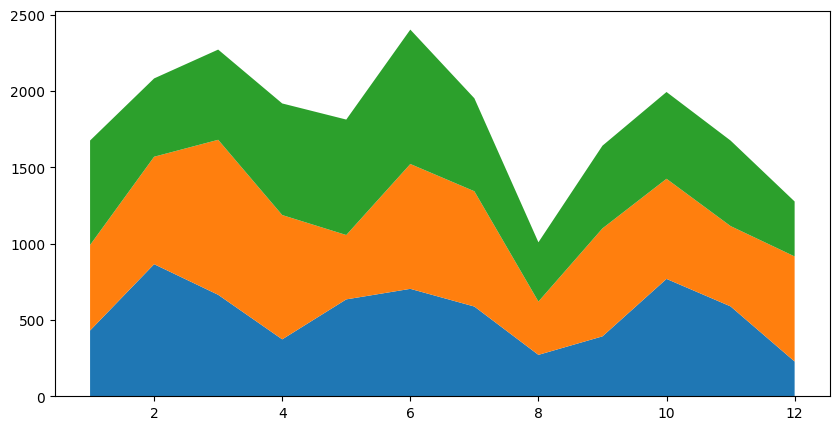

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.stackplot(year,sales_data)
plt.show()

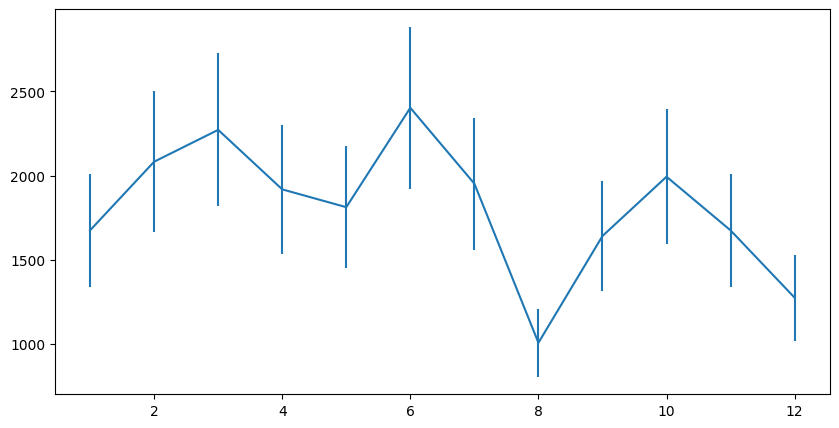

In [16]:
df_agg = df.groupby('Month')[['Sales']].sum()


plt.figure(figsize=(10,5))
plt.errorbar(df_agg.index , df_agg['Sales'], yerr=0.2*df_agg['Sales'])
plt.show()